<a href="https://colab.research.google.com/github/brach22/MachineLearning340/blob/main/Week12CombinedAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extrapolating Data Sets with Periodic Patterns

CSC/DSC 340 Week 12 Combined Assignment

Author: Dr. Julie Butler

Date Created: November 7, 2023

Last Modified: November 7, 2023



Let's start this notebook by creating the test data set (which a bit reversed from our normal set up).

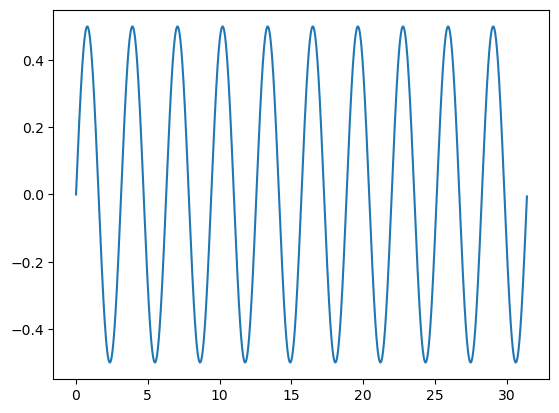

In [3]:
import numpy as np
import matplotlib.pyplot as plt

X_test= np.arange(0,10*np.pi,0.01)
y_test = np.cos(X_test)*np.sin(X_test)

plt.plot(X_test, y_test)

Next, let create our training data by removing the first 70 points of our test data.

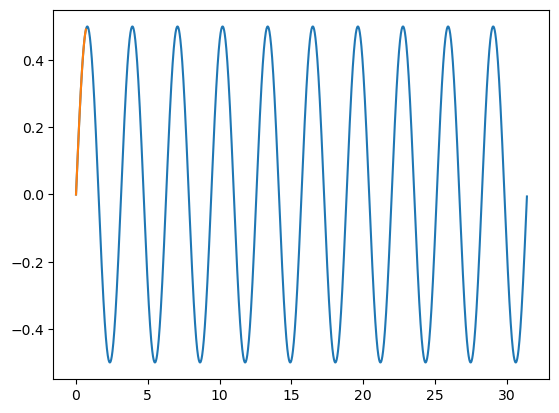

In [4]:
train_index = 70
X_train = X_test[:train_index]
y_train = y_test[:train_index]

plt.plot(X_test, y_test)
plt.plot(X_train, y_train)

## Assignment:

You goal is to create a machine learing algorithm which can reproduce the test data with as little error as possible.

Dr. Butler error: 4x10^-3 +- 0

## Rules
* You can use the entire training data set or any subset of the training data to train your model but the entire test set must be used to determine the error of the model
* You cannot use the test set in the training process or as a validation data set.
* Your model's accuracy is to be reported as the **root mean-squared error** of 5 runs of the code. A standard deviation must also be reported

# Work

## Imports


In [5]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import TimeseriesGenerator

## Time Series Formatting

In [17]:
n_features = 1

train_series = y_train.reshape((len(y_train), n_features))
test_series  = y_test.reshape((len(y_test), n_features))

seq  = 20

train_generator = TimeseriesGenerator(train_series, train_series,
                                      length        = seq, 
                                      sampling_rate = 1,
                                      stride        = 1,
                                      batch_size    = 10)

test_generator = TimeseriesGenerator(test_series, test_series,
                                      length        = seq, 
                                      sampling_rate = 1,
                                      stride        = 1,
                                      batch_size    = 10)

## Modeling

In [26]:
n_neurons  = 4

model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(1, 1)),
    tf.keras.layers.GRU(32, activation='relu', return_sequences=True),
    tf.keras.layers.GRU(32, activation='relu',return_sequences=True),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')

model.fit(train_generator,epochs=300, verbose=0)

y_pred  = model.predict(test_generator)

X_test = X_test.reshape(-1, 1, 1)
print(mse(y_test[20:], y_pred.flatten()))

plt.plot(X_train.flatten(),y_train)
plt.plot(X_test.flatten(),y_test)
plt.plot(X_test[20:].flatten(),y_pred)


2023-11-10 09:45:54.256611: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-11-10 09:46:15.529707: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


313/313 [==============================] - 1s 2ms/step


ValueError: Found input variables with inconsistent numbers of samples: [3142, 62440]